Training a Classifier

useful packages:

* images:Pillow, OpenCV
* audio: scipy, librosa
* text: raw Python, Cython, NLTK, SpaCy

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [3]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download = True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

Files already downloaded and verified


In [4]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
def imshow(img):
    img = img/2+0.5 #unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

 deer horse plane  frog


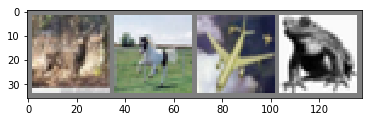

In [7]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [8]:
import torch.nn as nn
import torch.nn.functional as F

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn. Linear(120, 84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [10]:
net = Net()

In [11]:
import torch.optim as optim

In [51]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [52]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss/2000))
            running_loss=0.0
print('Finished Training')

[1,  2000] loss: 0.700
[1,  4000] loss: 0.763
[1,  6000] loss: 0.786
[1,  8000] loss: 0.797
[1, 10000] loss: 0.824
[1, 12000] loss: 0.846
[2,  2000] loss: 0.735
[2,  4000] loss: 0.746
[2,  6000] loss: 0.780
[2,  8000] loss: 0.762
[2, 10000] loss: 0.797
[2, 12000] loss: 0.798
Finished Training


GroundTruth:    cat  ship  ship plane


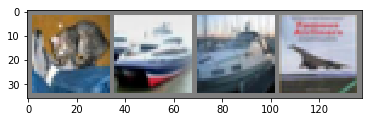

In [53]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [54]:
outputs = net(images)

In [55]:
_, predicted = torch.max(outputs, 1)

In [56]:
print('predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

predicted:    dog  ship  ship  ship


In [57]:
correct = 0
total = 0
with torch.no_grad():
    images, labels = data
    outputs = net(images)
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct/total))

Accuracy of the network on the 10000 test images: 100 %


In [58]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i]/ class_total[i]))

Accuracy of plane : 72 %
Accuracy of   car : 64 %
Accuracy of  bird : 46 %
Accuracy of   cat : 50 %
Accuracy of  deer : 54 %
Accuracy of   dog : 49 %
Accuracy of  frog : 74 %
Accuracy of horse : 64 %
Accuracy of  ship : 76 %
Accuracy of truck : 70 %
